### Problem Statement

##### Your client is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across country. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.



Overview of your client On-boarding process
The Managers at your client are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to your client to become an agent. This date is known as application_receipt_date.

In the next 3 months, this potential agent has to undergo a 7 days training at the your client's branch (about Sales processes and various products) and clear a subsequent examination in order to become an agent.




The problem - Who are the best agents?
As is obvious in the above process, there is a significant investment which your cleint makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business.

Your client is looking for help from data scientists like you to help them provide insigths using their past recruitment data. They want to predict the target variable for each potential agent, which would help them identify the right agents to hire.


### Data Ditictionary

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')
dfte=pd.read_csv('test.csv')

In [4]:
df.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [5]:
dfte.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
Office_PIN,Office_PIN,0.000000
Application_Receipt_Date,Application_Receipt_Date,0.000000
Applicant_City_PIN,Applicant_City_PIN,1.018159
Applicant_Gender,Applicant_Gender,0.703264
Applicant_BirthDate,Applicant_BirthDate,0.766243
Applicant_Marital_Status,Applicant_Marital_Status,0.766243
Applicant_Occupation,Applicant_Occupation,12.816207
Applicant_Qualification,Applicant_Qualification,0.902698
Manager_DOJ,Manager_DOJ,7.169098


In [8]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [9]:
df.isnull().mean() * 100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

In [28]:
df1=df.copy() # backup

### Work on copy df1

In [29]:
df1.drop(['ID'],1,inplace=True)

In [30]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,03-03-1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,02-03-1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,07-04-1985,M,Others,Class XII,05-08-2006,...,Confirmation,M,02-07-1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [31]:
df1.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Office_PIN                   9527 non-null   int64  
 1   Application_Receipt_Date     9527 non-null   object 
 2   Applicant_City_PIN           9430 non-null   float64
 3   Applicant_Gender             9460 non-null   object 
 4   Applicant_BirthDate          9454 non-null   object 
 5   Applicant_Marital_Status     9454 non-null   object 
 6   Applicant_Occupation         8306 non-null   object 
 7   Applicant_Qualification      9441 non-null   object 
 8   Manager_DOJ                  8844 non-null   object 
 9   Manager_Joining_Designation  8844 non-null   object 
 10  Manager_Current_Designation  8844 non-null   object 
 11  Manager_Grade                8844 non-null   float64
 12  Manager_Status               8844 non-null   object 
 13  Manager_Gender    

In [33]:
df1['Applicant_Gender'].value_counts(normalize=True)*100

M    75.887949
F    24.112051
Name: Applicant_Gender, dtype: float64

In [34]:
df['Manager_Gender'].value_counts(normalize=True)*100 # percentage wise distribution

M    86.239258
F    13.760742
Name: Manager_Gender, dtype: float64

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,03-03-1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,02-03-1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,07-04-1985,M,Others,Class XII,05-08-2006,...,Confirmation,M,02-07-1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [36]:
# Gender feature imputed with mode & converted to categorical
df1['Manager_Gender']=df1['Manager_Gender'].map({'M':1,'F':0,'Other':2})
df1['Manager_Gender']=df1['Manager_Gender'].fillna(1).astype('int')

df1['Applicant_Gender']=df1['Applicant_Gender'].map({'M':1,'F':0,'Other':2})
df1['Applicant_Gender']=df1['Applicant_Gender'].fillna(1).astype('int')

# Applicant_Marital_Status feature imputed with mode & converted to categorical 
df1['Applicant_Marital_Status']=df1['Applicant_Marital_Status'].fillna('Status_Unkown')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Applicant_Marital_Status']=le.fit_transform(df1['Applicant_Marital_Status'])

# Applicant_Occupation feature imputed with mode & converted to categorical 
df1['Applicant_Occupation']=df1['Applicant_Occupation'].fillna('Occupation_Unkown')
df1['Applicant_Occupation']=le.fit_transform(df1['Applicant_Occupation'])

# Applicant_Occupation feature imputed with mode & converted to categorical 
df1['Applicant_Qualification']=df1['Applicant_Qualification'].fillna('Qualification_Unkown')
df1['Applicant_Qualification']=le.fit_transform(df1['Applicant_Qualification'])

# Applicant_City_PIN feature imputed with median 
#df1['Applicant_City_PIN']=df1['Applicant_City_PIN'].fillna(422005)
#df1['Applicant_City_PIN']=le.fit_transform(df1['Applicant_City_PIN'])
df1['Applicant_City_PIN'] = df1['Applicant_City_PIN'].fillna((df1['Applicant_City_PIN'].median())).astype('int')
df1['Applicant_City_PIN'] = df1['Applicant_City_PIN'].astype(str).str[:-5].astype(np.int64)

# Applicant_City_PIN feature imputed with median
df1['Office_PIN'] = df1['Office_PIN'].astype(str).str[:-5].astype(np.int64)

'''

# Application_Receipt_Date feature imputed with mode & converted to categorical 
df1['Application_Receipt_Date']=df1['Application_Receipt_Date'].fillna('-99')
df1['Application_Receipt_Date']=le.fit_transform(df1['Application_Receipt_Date'])

# Applicant_BirthDate feature imputed with mode & converted to categorical 
df1['Applicant_BirthDate']=df1['Applicant_BirthDate'].fillna('-99')
df1['Applicant_BirthDate']=le.fit_transform(df1['Applicant_BirthDate'])

# Manager_DOJ feature imputed with mode & converted to categorical 
df1['Manager_DOJ']=df1['Manager_DOJ'].fillna('-99')
df1['Manager_DOJ']=le.fit_transform(df1['Manager_DOJ'])

# Manager_DoB feature imputed with mode & converted to categorical 
df1['Manager_DoB']=df1['Manager_DoB'].fillna('-99')
df1['Manager_DoB']=le.fit_transform(df1['Manager_DoB'])
'''
from datetime import datetime, date
# Date converion and age calculation
#df1['Application_Receipt_Date'] = pd.to_datetime(df1['Application_Receipt_Date'], errors = 'coerce')
#allHoldings['carry_dt'] = pd.to_datetime(allHoldings['carry_dt'], errors='coerce')
df1[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']] = df1[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']].apply(pd.to_datetime,errors ='coerce')

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
df1['Manager_Joining_Designation']=df1['Manager_Joining_Designation'].fillna('Designation_Unkown')
df1['Manager_Joining_Designation']=le.fit_transform(df1['Manager_Joining_Designation'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
df1['Manager_Current_Designation']=df1['Manager_Current_Designation'].fillna('Current_Designation_Unkown')
df1['Manager_Current_Designation']=le.fit_transform(df1['Manager_Current_Designation'])

# Manager_Grade feature imputed with median 
df1['Manager_Grade']=le.fit_transform(df1['Manager_Grade'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
df1['Manager_Status']=df1['Manager_Status'].fillna('Manager_Status_Unkown')
df1['Manager_Status']=le.fit_transform(df1['Manager_Status'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
df1['Manager_Status']=df1['Manager_Status'].fillna('Manager_Status_Unkown')
df1['Manager_Status']=le.fit_transform(df1['Manager_Status'])

# Manager_Grade feature imputed with median 
df1['Manager_Num_Application']=le.fit_transform(df1['Manager_Num_Application'])

# Manager_Num_Coded feature imputed with median 
df1['Manager_Num_Coded']=le.fit_transform(df1['Manager_Num_Coded'])

# Manager_Business feature imputed with median 
df1['Manager_Business']=le.fit_transform(df1['Manager_Business'])

# Manager_Num_Products feature imputed with median 
df1['Manager_Num_Products']=le.fit_transform(df1['Manager_Num_Products'])

# Manager_Business2 feature imputed with median 
df1['Manager_Business2']=le.fit_transform(df1['Manager_Business2'])

# Manager_Num_Products2 feature imputed with median 
df1['Manager_Num_Products2']=le.fit_transform(df1['Manager_Num_Products2'])

from datetime import datetime, date
ref_date = datetime.now()

df1['Applicant_BirthDate'] =  df1['Applicant_BirthDate'].astype(str)
df1['Applicant_BirthDate'] = df1['Applicant_BirthDate'].apply(lambda x : ref_date if x=="NaT" else x)

df1['Manager_DOJ'] =  df1['Manager_DOJ'].astype(str)
df1['Manager_DOJ'] = df1['Manager_DOJ'].apply(lambda x : ref_date if x=="NaT" else x)

df1['Manager_DoB'] =  df1['Manager_DoB'].astype(str)
df1['Manager_DoB'] = df1['Manager_DoB'].apply(lambda x : ref_date if x=="NaT" else x)

df1['Applicant_receipt_age'] = df1['Application_Receipt_Date'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
df1['Applicant_Age'] = df1['Applicant_BirthDate'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
df1['Manager_Exp'] = df1['Manager_DOJ'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
df1['Manager_Age'] = df1['Manager_DoB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

# Applicant reciept age , applicant age , manager experience and manager age feature imputed with median 
df1['Applicant_receipt_age']=le.fit_transform(df1['Applicant_receipt_age'])
df1['Applicant_Age']=le.fit_transform(df1['Applicant_Age'])
df1['Manager_Exp']=le.fit_transform(df1['Manager_Exp'])
df1['Manager_Age']=le.fit_transform(df1['Manager_Age'])

#Droping date columns
col = ["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']
df1.drop(col, axis=1, inplace=True)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Office_PIN                   9527 non-null   int64         
 1   Application_Receipt_Date     9527 non-null   datetime64[ns]
 2   Applicant_City_PIN           9527 non-null   int64         
 3   Applicant_Gender             9527 non-null   int32         
 4   Applicant_BirthDate          9527 non-null   object        
 5   Applicant_Marital_Status     9527 non-null   int32         
 6   Applicant_Occupation         9527 non-null   int32         
 7   Applicant_Qualification      9527 non-null   int32         
 8   Manager_DOJ                  9527 non-null   object        
 9   Manager_Joining_Designation  9527 non-null   int32         
 10  Manager_Current_Designation  9527 non-null   int32         
 11  Manager_Grade                9527 non-null 

In [60]:
df1['Business_Sourced'].value_counts(normalize=True)*100# Imbalanced dataset

0    65.707988
1    34.292012
Name: Business_Sourced, dtype: float64

#### Test data engineering

In [70]:
dfte1 = dfte.copy()
dfte1.drop(['ID'],1,inplace=True)
dfte1.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [71]:
# Gender feature imputed with mode & converted to categorical
dfte1['Manager_Gender']=dfte1['Manager_Gender'].map({'M':1,'F':0,'Other':2})
dfte1['Manager_Gender']=dfte1['Manager_Gender'].fillna(1).astype('int')

dfte1['Applicant_Gender']=dfte1['Applicant_Gender'].map({'M':1,'F':0,'Other':2})
dfte1['Applicant_Gender']=dfte1['Applicant_Gender'].fillna(1).astype('int')

# Applicant_Marital_Status feature imputed with mode & converted to categorical 
dfte1['Applicant_Marital_Status']=dfte1['Applicant_Marital_Status'].fillna('Status_Unkown')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfte1['Applicant_Marital_Status']=le.fit_transform(dfte1['Applicant_Marital_Status'])

# Applicant_Occupation feature imputed with mode & converted to categorical 
dfte1['Applicant_Occupation']=dfte1['Applicant_Occupation'].fillna('Occupation_Unkown')
dfte1['Applicant_Occupation']=le.fit_transform(dfte1['Applicant_Occupation'])

# Applicant_Occupation feature imputed with mode & converted to categorical 
dfte1['Applicant_Qualification']=dfte1['Applicant_Qualification'].fillna('Qualification_Unkown')
dfte1['Applicant_Qualification']=le.fit_transform(dfte1['Applicant_Qualification'])

# Applicant_City_PIN feature imputed with median 
#dfte1['Applicant_City_PIN']=dfte1['Applicant_City_PIN'].fillna(422005)
#dfte1['Applicant_City_PIN']=le.fit_transform(dfte1['Applicant_City_PIN'])
dfte1['Applicant_City_PIN'] = dfte1['Applicant_City_PIN'].fillna((dfte1['Applicant_City_PIN'].median())).astype('int')
dfte1['Applicant_City_PIN'] = dfte1['Applicant_City_PIN'].astype(str).str[:-5].astype(np.int64)

# Applicant_City_PIN feature imputed with median
dfte1['Office_PIN'] = dfte1['Office_PIN'].astype(str).str[:-5].astype(np.int64)

'''

# Application_Receipt_Date feature imputed with mode & converted to categorical 
dfte1['Application_Receipt_Date']=dfte1['Application_Receipt_Date'].fillna('-99')
dfte1['Application_Receipt_Date']=le.fit_transform(dfte1['Application_Receipt_Date'])

# Applicant_BirthDate feature imputed with mode & converted to categorical 
dfte1['Applicant_BirthDate']=dfte1['Applicant_BirthDate'].fillna('-99')
dfte1['Applicant_BirthDate']=le.fit_transform(dfte1['Applicant_BirthDate'])

# Manager_DOJ feature imputed with mode & converted to categorical 
dfte1['Manager_DOJ']=dfte1['Manager_DOJ'].fillna('-99')
dfte1['Manager_DOJ']=le.fit_transform(dfte1['Manager_DOJ'])

# Manager_DoB feature imputed with mode & converted to categorical 
dfte1['Manager_DoB']=dfte1['Manager_DoB'].fillna('-99')
dfte1['Manager_DoB']=le.fit_transform(dfte1['Manager_DoB'])
'''
from datetime import datetime, date
# Date converion and age calculation
#dfte1['Application_Receipt_Date'] = pd.to_datetime(dfte1['Application_Receipt_Date'], errors = 'coerce')
#allHoldings['carry_dt'] = pd.to_datetime(allHoldings['carry_dt'], errors='coerce')
dfte1[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']] = dfte1[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']].apply(pd.to_datetime,errors ='coerce')

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
dfte1['Manager_Joining_Designation']=dfte1['Manager_Joining_Designation'].fillna('Designation_Unkown')
dfte1['Manager_Joining_Designation']=le.fit_transform(dfte1['Manager_Joining_Designation'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
dfte1['Manager_Current_Designation']=dfte1['Manager_Current_Designation'].fillna('Current_Designation_Unkown')
dfte1['Manager_Current_Designation']=le.fit_transform(dfte1['Manager_Current_Designation'])

# Manager_Grade feature imputed with median 
dfte1['Manager_Grade']=le.fit_transform(dfte1['Manager_Grade'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
dfte1['Manager_Status']=dfte1['Manager_Status'].fillna('Manager_Status_Unkown')
dfte1['Manager_Status']=le.fit_transform(dfte1['Manager_Status'])

# Manager_Joining_Designation feature imputed with mode & converted to categorical 
dfte1['Manager_Status']=dfte1['Manager_Status'].fillna('Manager_Status_Unkown')
dfte1['Manager_Status']=le.fit_transform(dfte1['Manager_Status'])

# Manager_Grade feature imputed with median 
dfte1['Manager_Num_Application']=le.fit_transform(dfte1['Manager_Num_Application'])

# Manager_Num_Coded feature imputed with median 
dfte1['Manager_Num_Coded']=le.fit_transform(dfte1['Manager_Num_Coded'])

# Manager_Business feature imputed with median 
dfte1['Manager_Business']=le.fit_transform(dfte1['Manager_Business'])

# Manager_Num_Products feature imputed with median 
dfte1['Manager_Num_Products']=le.fit_transform(dfte1['Manager_Num_Products'])

# Manager_Business2 feature imputed with median 
dfte1['Manager_Business2']=le.fit_transform(dfte1['Manager_Business2'])

# Manager_Num_Products2 feature imputed with median 
dfte1['Manager_Num_Products2']=le.fit_transform(dfte1['Manager_Num_Products2'])

from datetime import datetime, date
ref_date = datetime.now()

dfte1['Applicant_BirthDate'] =  dfte1['Applicant_BirthDate'].astype(str)
dfte1['Applicant_BirthDate'] = dfte1['Applicant_BirthDate'].apply(lambda x : ref_date if x=="NaT" else x)

dfte1['Manager_DOJ'] =  dfte1['Manager_DOJ'].astype(str)
dfte1['Manager_DOJ'] = dfte1['Manager_DOJ'].apply(lambda x : ref_date if x=="NaT" else x)

dfte1['Manager_DoB'] =  dfte1['Manager_DoB'].astype(str)
dfte1['Manager_DoB'] = dfte1['Manager_DoB'].apply(lambda x : ref_date if x=="NaT" else x)

dfte1['Applicant_receipt_age'] = dfte1['Application_Receipt_Date'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
dfte1['Applicant_Age'] = dfte1['Applicant_BirthDate'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
dfte1['Manager_Exp'] = dfte1['Manager_DOJ'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))
dfte1['Manager_Age'] = dfte1['Manager_DoB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

# Applicant reciept age , applicant age , manager experience and manager age feature imputed with median 
dfte1['Applicant_receipt_age']=le.fit_transform(dfte1['Applicant_receipt_age'])
dfte1['Applicant_Age']=le.fit_transform(dfte1['Applicant_Age'])
dfte1['Manager_Exp']=le.fit_transform(dfte1['Manager_Exp'])
dfte1['Manager_Age']=le.fit_transform(dfte1['Manager_Age'])

#Droping date columns
col = ["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']
dfte1.drop(col, axis=1, inplace=True)


In [65]:
dfte1.info()
dfte1.tail()
df1.to_csv("df1_train_letransform1.csv",index=False)
dfte1.to_csv("dfte1_test_letransform1.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Office_PIN                   5045 non-null   int64
 1   Applicant_City_PIN           5045 non-null   int64
 2   Applicant_Gender             5045 non-null   int32
 3   Applicant_Marital_Status     5045 non-null   int32
 4   Applicant_Occupation         5045 non-null   int32
 5   Applicant_Qualification      5045 non-null   int32
 6   Manager_Joining_Designation  5045 non-null   int32
 7   Manager_Current_Designation  5045 non-null   int32
 8   Manager_Grade                5045 non-null   int64
 9   Manager_Status               5045 non-null   int64
 10  Manager_Gender               5045 non-null   int32
 11  Manager_Num_Application      5045 non-null   int64
 12  Manager_Num_Coded            5045 non-null   int64
 13  Manager_Business             5045 non-null   int

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Applicant_receipt_age,Applicant_Age,Manager_Exp,Manager_Age
5040,6,6,0,1,2,4,2,2,1,2,...,0,0,2,0,2,0,0,27,1,10
5041,6,6,1,1,2,4,2,2,1,2,...,0,0,2,0,2,0,0,44,1,10
5042,6,6,1,1,0,3,2,2,1,2,...,0,0,2,0,2,0,0,16,1,10
5043,2,2,1,1,1,4,2,2,1,2,...,4,1,30,1,32,1,0,8,1,10
5044,1,1,1,1,1,4,2,2,1,2,...,0,0,2,0,2,0,0,8,1,5


In [27]:
df1['Applicant_receipt_age1'].value_counts(normalize=True)*100# Imbalanced dataset

160    11.304713
154     9.572793
153     8.869529
148     8.701585
157     7.588958
147     7.525979
158     7.316049
161     6.087961
155     5.951506
152     5.563136
156     5.479164
159     4.943844
149     4.555474
151     4.387530
150     1.962842
146     0.188937
Name: Applicant_receipt_age1, dtype: float64

#### Lets Try without oversampling and smote

In [66]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df1.drop('Business_Sourced',1)
y=df1['Business_Sourced']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble



,names,auc_score,training,testing,precision,recall
0,Random Forest,0.610892,0.998950,0.651102,0.477477,0.244615
1,Ada boost,0.600436,0.664086,0.657922,0.488889,0.067692
2,Bagging,0.583294,0.975987,0.646905,0.468320,0.261538
3,Naive-Bayes,0.572467,0.631807,0.619622,0.378641,0.180000
4,KNN,0.559799,0.736780,0.615425,0.410753,0.293846
5,Decistion Tree,0.543631,0.998950,0.590241,0.399386,0.400000
6,bagged LR,0.514653,0.656476,0.658972,0.000000,0.000000
7,Logistic Regression,0.513542,0.656738,0.658972,0.000000,0.000000


In [74]:
## Making predictions:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()

adb.fit(X,y)
y_test_pred_adb=adb.predict(dfte1)

finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_adb,columns=['Business_Sourced'])],1)
finalpred.to_csv("submission_adbpred1.csv",index=False)

In [79]:
## Making predictions:
from sklearn.ensemble import RandomForestClassifier
rfb=RandomForestClassifier()

rfb.fit(X,y)
y_test_pred_rfb=rfb.predict(dfte1)

finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_rfb,columns=['Business_Sourced'])],1)
finalpred.to_csv("submission_rfbpred1.csv",index=False)

## Smote



In [80]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [81]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=X_smote
y=y_smote
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.778517,0.999201,0.711661,0.717866,0.704203
1,Bagging,0.742685,0.985323,0.687700,0.714030,0.633624
2,KNN,0.699862,0.780152,0.652955,0.631720,0.745440
3,Ada boost,0.692651,0.643970,0.638179,0.638132,0.650278
4,Naive-Bayes,0.635412,0.607129,0.607029,0.623771,0.553529
5,Decistion Tree,0.630494,0.999201,0.630591,0.628244,0.652657
6,bagged LR,0.564597,0.546226,0.549920,0.564547,0.464711
7,Logistic Regression,0.556929,0.543331,0.541134,0.555118,0.447264


### RF

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_smote,y_smote)

y_test_pred_rf=rf.predict(dfte1)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_rf,columns=['Business_Sourced'])],1)
finalpred.to_csv("rfpred2.csv",index=False)

### DT

In [89]:
X=X_smote
y=y_smote
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
rscv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
rscv.fit(X, y)
print(rscv.best_params_)
rscv_best_DT=rscv.best_params_

DT=DecisionTreeClassifier(**rscv_best_DT)
DT.fit(X_smote,y_smote)
y_test_pred_DT=DT.predict(dfte1)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_DT,columns=['Business_Sourced'])],1)
finalpred.to_csv("DTpred1.csv",index=False)

{'min_samples_leaf': 24, 'max_depth': 7, 'criterion': 'gini'}


### XGB classifier

In [90]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [91]:
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,colsample_bytree=0.5,reg_alpha=0.000001 )

In [92]:
xgb.fit(X_smote,y_smote)
y_test_pred_xgb=xgb.predict(dfte1)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred1.csv",index=False)

### using get_dummies

In [93]:
df3=df.copy() # backup

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
ohe=OneHotEncoder(sparse=False)

In [96]:
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
Application_Receipt_Date,Application_Receipt_Date,0.000000
Business_Sourced,Business_Sourced,0.000000
Office_PIN,Office_PIN,0.000000
Applicant_Gender,Applicant_Gender,0.703264
Applicant_BirthDate,Applicant_BirthDate,0.766243
Applicant_Marital_Status,Applicant_Marital_Status,0.766243
Applicant_Qualification,Applicant_Qualification,0.902698
Applicant_City_PIN,Applicant_City_PIN,1.018159
Manager_Business2,Manager_Business2,7.169098


In [97]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [112]:
df3['Office_PIN']=df1['Office_PIN'].copy().astype('object')
df3['Applicant_City_PIN']=df1['Applicant_City_PIN'].copy().astype('object')
df3['Applicant_receipt_age']=df1['Applicant_receipt_age'].copy()
df3['Applicant_Age']=df1['Applicant_Age'].copy()
df3['Manager_Exp']=df1['Manager_Exp'].copy()
df3['Applicant_receipt_age']=df1['Applicant_receipt_age'].copy()
df3['Manager_Age']=df1['Manager_Age'].copy()
df3['Applicant_Gender']=df1['Applicant_Gender'].copy().astype('object')
df3['Applicant_Marital_Status']=df1['Applicant_Marital_Status'].copy().astype('object')
df3['Applicant_Occupation'].fillna('no_occupation',inplace=True)
df3['Manager_Joining_Designation'].fillna('Missing_Designation',inplace=True)
df3['Manager_Current_Designation'].fillna('Missing_Designation',inplace=True)
df3['Manager_Grade'].fillna(-99,inplace=True)
df3['Manager_Status'].fillna('Missing_Status',inplace=True)
df3['Manager_Gender'].fillna('Missing_Gender',inplace=True)
df3['Manager_Num_Application'].fillna(-99,inplace=True)
df3['Manager_Num_Coded'].fillna(-99,inplace=True)
df3['Manager_Business'].fillna(-99,inplace=True)
df3['Manager_Num_Products'].fillna(-99,inplace=True)
df3['Manager_Business2'].fillna(-99,inplace=True)
df3['Manager_Num_Products2'].fillna(-99,inplace=True)

#Droping date columns
col = ["ID","Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']
df3.drop(col, axis=1, inplace=True)



In [116]:
df3.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_receipt_age,Applicant_Age,Manager_Exp,Manager_Age
0,8,8,1,1,Others,Graduate,Level 1,Level 2,3.0,Confirmation,...,1.0,335249.0,28.0,335249.0,28.0,0,1,21,4,9
1,8,8,1,2,Others,Class XII,Level 1,Level 2,3.0,Confirmation,...,1.0,335249.0,28.0,335249.0,28.0,1,1,9,4,9
2,8,8,1,1,Business,Class XII,Level 1,Level 1,2.0,Confirmation,...,0.0,357184.0,24.0,357184.0,24.0,0,1,26,3,18
3,8,8,1,2,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,...,0.0,318356.0,22.0,318356.0,22.0,0,1,4,6,9
4,8,8,1,1,Others,Class XII,Level 1,Level 1,2.0,Confirmation,...,1.0,230402.0,17.0,230402.0,17.0,0,1,7,3,16


In [114]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   object 
 2   Applicant_City_PIN           9527 non-null   object 
 3   Applicant_Gender             9527 non-null   object 
 4   Applicant_Marital_Status     9527 non-null   object 
 5   Applicant_Occupation         9527 non-null   object 
 6   Applicant_Qualification      9441 non-null   object 
 7   Manager_Joining_Designation  9527 non-null   object 
 8   Manager_Current_Designation  9527 non-null   object 
 9   Manager_Grade                9527 non-null   float64
 10  Manager_Status               9527 non-null   object 
 11  Manager_Gender               9527 non-null   object 
 12  Manager_Num_Application      9527 non-null   float64
 13  Manager_Num_Coded 

### Test data engineering

In [117]:
dfte3=dfte.copy() # backup

In [118]:
dfte3['Office_PIN']=dfte1['Office_PIN'].copy().astype('object')
dfte3['Applicant_City_PIN']=dfte1['Applicant_City_PIN'].copy().astype('object')
dfte3['Applicant_receipt_age']=dfte1['Applicant_receipt_age'].copy()
dfte3['Applicant_Age']=dfte1['Applicant_Age'].copy()
dfte3['Manager_Exp']=dfte1['Manager_Exp'].copy()
dfte3['Applicant_receipt_age']=dfte1['Applicant_receipt_age'].copy()
dfte3['Manager_Age']=dfte1['Manager_Age'].copy()
dfte3['Applicant_Gender']=dfte1['Applicant_Gender'].copy().astype('object')
dfte3['Applicant_Marital_Status']=dfte1['Applicant_Marital_Status'].copy().astype('object')
dfte3['Applicant_Occupation'].fillna('no_occupation',inplace=True)
dfte3['Manager_Joining_Designation'].fillna('Missing_Designation',inplace=True)
dfte3['Manager_Current_Designation'].fillna('Missing_Designation',inplace=True)
dfte3['Manager_Grade'].fillna(-99,inplace=True)
dfte3['Manager_Status'].fillna('Missing_Status',inplace=True)
dfte3['Manager_Gender'].fillna('Missing_Gender',inplace=True)
dfte3['Manager_Num_Application'].fillna(-99,inplace=True)
dfte3['Manager_Num_Coded'].fillna(-99,inplace=True)
dfte3['Manager_Business'].fillna(-99,inplace=True)
dfte3['Manager_Num_Products'].fillna(-99,inplace=True)
dfte3['Manager_Business2'].fillna(-99,inplace=True)
dfte3['Manager_Num_Products2'].fillna(-99,inplace=True)

#Droping date columns
col = ["ID","Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ",'Manager_DoB']
dfte3.drop(col, axis=1, inplace=True)


In [121]:
df4=pd.get_dummies(data=df3,drop_first=True)
df4.shape  # 64 Cols

(9527, 64)

In [119]:
dfte4=pd.get_dummies(data=dfte3,drop_first=True)

In [120]:
dfte4.shape  # 57 cols

(5045, 57)

In [122]:
df4.to_csv("df4_ohe.csv",index=False)
dfte4.to_csv("dfte4_ohe.csv",index=False)

In [124]:
df5 =df4.copy()
dfte5 = dfte4.copy()

In [125]:
#Droping unmatched  columns
col = ["Applicant_City_PIN_9","Applicant_Qualification_Associate/Fellow of Acturial Society of India"
       , "Applicant_Qualification_Associate/Fellow of Institute of Company Secretories of India",
       "Applicant_Qualification_Associate/Fellow of Insurance Institute of India",
       'Applicant_Qualification_Certified Associateship of Indian Institute of Bankers','Manager_Joining_Designation_Level 7',
      'Manager_Joining_Designation_Other']
df5.drop(col, axis=1, inplace=True)

In [126]:
#Droping unmatched  columns
col = ["Applicant_Qualification_Associate/Fellow of Institute of Institute of Costs and Works Accountants of India"]
dfte5.drop(col, axis=1, inplace=True)

In [127]:
df5.shape

(9527, 57)

In [129]:
dfte5.shape

(5045, 56)

In [130]:
X=df5.drop('Business_Sourced',1)
y=df5['Business_Sourced']
X_smote1, y_smote1 = oversample.fit_resample(X, y)

In [134]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=X_smote1
y=y_smote1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier() 
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

#  ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_train,X_test, y_train, y_test)
#  'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                 'Naive-Bayes','KNN','Decistion Tree',
                                 'bagged LR'],
                        'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble


,names,auc_score,training,testing,precision,recall
0,Random Forest,0.797354,0.996805,0.734425,0.765125,0.681998
1,Bagging,0.781039,0.981430,0.716454,0.753450,0.649485
2,Ada boost,0.764191,0.697584,0.696086,0.737643,0.615385
3,KNN,0.678607,0.764776,0.630990,0.620271,0.689136
4,Decistion Tree,0.654358,0.996805,0.654553,0.650915,0.677240
5,Naive-Bayes,0.540766,0.521366,0.510383,0.535497,0.209358
6,Logistic Regression,0.491242,0.488119,0.482428,0.489736,0.662173
7,bagged LR,0.490363,0.505292,0.500000,0.501932,0.927042


### RF

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_smote1,y_smote1)

y_test_pred_rf=rf.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_rf,columns=['Business_Sourced'])],1)
finalpred.to_csv("rfpred3.csv",index=False)

In [136]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,colsample_bytree=0.5,reg_alpha=0.000001 )
xgb.fit(X_smote1,y_smote1)
y_test_pred_xgb=xgb.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred2.csv",index=False)

In [137]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [138]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.6330704100276618)

In [139]:
xgb= XGBClassifier( learning_rate =0.1,reg_alpha=0.006, n_estimators=125, max_depth=9,
                   min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [140]:
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred3.csv",index=False)

In [141]:
param_test2b = {
  'min_child_weight':[6,8,10,12]
 }
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=125, max_depth=3,
  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
  param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X,y)

gsearch2b.best_params_, gsearch2b.best_score_

 
 


({'min_child_weight': 10}, 0.6109320295195418)

In [142]:
xgb= XGBClassifier( learning_rate =0.1,reg_alpha=0.006, n_estimators=125, max_depth=9,
                   min_child_weight=10, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred4.csv",index=False)

In [144]:
param_test3 = {
  'gamma':[i/10.0 for i in range(0,5)]
 }
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=125, max_depth=3,
  min_child_weight=12, gamma=0, subsample=0.8, colsample_bytree=0.8,
  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
  param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, 0.6076773647786544)

In [145]:
xgb= XGBClassifier( learning_rate =0.1,reg_alpha=0.006, n_estimators=125, max_depth=9,
                   min_child_weight=10, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred5.csv",index=False)

In [147]:
param_test7 = {
  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
 }
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=125, max_depth=3,
  min_child_weight=12, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
  param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X,y)
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 0.005}, 0.6079990864457125)

In [148]:
xgb= XGBClassifier( learning_rate =0.1,reg_alpha=0.005, n_estimators=125, max_depth=9,
                   min_child_weight=10, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(dfte5)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(y_test_pred_xgb,columns=['Business_Sourced'])],1)
finalpred.to_csv("xgbpred6.csv",index=False)

In [149]:
df5.to_csv("df5ohe.csv",index=False)
dfte5.to_csv("df5ohe.csv",index=False)

## Standardizing features


In [180]:
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import KFold,StratifiedKFold
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import save_model
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [152]:
y_hat=to_categorical(y)
y_hat=pd.DataFrame(y_hat)
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
X=pd.DataFrame(X)
sc_X_main=StandardScaler()
X_main_test=sc_X_main.fit_transform(dfte5)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.268754,0.282870,0.288461,0.583107,0.995695,0.592865,0.996693,0.77275,0.379377,0.583611,...,-0.279634,1.517993,-0.477297,-0.322427,-0.09063,-0.279634,-0.279634,-0.766566,0.541653,-0.279634
1,0.268754,0.282870,0.288461,0.583107,0.995695,0.592865,0.996693,0.77275,-0.804840,0.583611,...,-0.279634,1.517993,-0.477297,-0.322427,-0.09063,-0.279634,-0.279634,-0.766566,0.541653,-0.279634
2,0.231091,0.206664,0.249852,0.662935,0.856219,0.673421,0.857169,0.77275,0.872800,0.053863,...,-0.279634,-0.658765,-0.477297,-0.322427,-0.09063,-0.279634,-0.279634,-0.766566,0.541653,-0.279634
3,0.306417,0.206664,0.249852,0.521628,0.786481,0.530825,0.787407,0.77275,-1.298264,1.643105,...,-0.279634,-0.658765,2.095133,-0.322427,-0.09063,-0.279634,-0.279634,-0.766566,-1.846199,-0.279634
4,0.231091,0.282870,0.288461,0.201535,0.612135,0.207816,0.613002,0.77275,-1.002210,0.053863,...,-0.279634,-0.658765,-0.477297,-0.322427,-0.09063,-0.279634,-0.279634,-0.766566,0.541653,-0.279634


In [154]:
X_train,X_val,y_train,y_val=train_test_split(X,y_hat,test_size=0.2,random_state=294)

In [178]:
#!pip install libhdf5
!pip install h5py
!pip install cython

In [185]:
from h5py import *
#import cython

ImportError: DLL load failed: The specified module could not be found.

In [181]:
classifier=Sequential()

classifier.add(Dense(512,activation='relu', kernel_initializer='uniform',input_shape=(X_train.shape[1],)))
classifier.add(Dropout(0.2))
classifier.add(Dense(256,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(200,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(128,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(64,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(2,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
callback_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.3,min_lr=0.00001)
callback_mc=ModelCheckpoint(filepath='model_repli.hdf5',monitor='val_accuracy',save_best_only=True,mode='max')
callbacks_list = [callback_lr,callback_mc]


In [187]:
classifier.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_val,y_val),callbacks=[callback_lr])

#classifier=load_model('model_repli.hdf5')
pred_val=classifier.predict(X_val)

preds=classifier.predict(X_main_test)

Train on 11268 samples, validate on 1252 samples
Epoch 1/50
11268/11268 [==============================] - 2s 194us/step - loss: 0.5393 - accuracy: 0.6929 - val_loss: 0.5541 - val_accuracy: 0.6773
Epoch 2/50
11268/11268 [==============================] - 2s 168us/step - loss: 0.5324 - accuracy: 0.6997 - val_loss: 0.5508 - val_accuracy: 0.6757
Epoch 3/50
11268/11268 [==============================] - 2s 158us/step - loss: 0.5263 - accuracy: 0.6982 - val_loss: 0.5551 - val_accuracy: 0.6853
Epoch 4/50
11268/11268 [==============================] - 2s 158us/step - loss: 0.5237 - accuracy: 0.7080 - val_loss: 0.5419 - val_accuracy: 0.6981
Epoch 5/50
11268/11268 [==============================] - 2s 160us/step - loss: 0.5197 - accuracy: 0.7098 - val_loss: 0.5407 - val_accuracy: 0.6877
Epoch 6/50
11268/11268 [==============================] - 2s 159us/step - loss: 0.5156 - accuracy: 0.7102 - val_loss: 0.5442 - val_accuracy: 0.7037
Epoch 7/50
11268/11268 [==============================] - 2s 15

In [192]:
preds1.shape

(5045,)

In [193]:
preds1=pd.DataFrame(preds).idxmax(axis=1)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(preds1,columns=['Business_Sourced'])],1)
finalpred.to_csv("NN1.csv",index=False)

In [194]:
#import h5py
kf=KFold(n_splits=10,shuffle=True,random_state=2019)
# sc_X=StandardScaler()
# X=pd.DataFrame(sc_X.fit_transform(X))
preds=0
acc_score=0


    
for i,(train_idx,val_idx) in enumerate(kf.split(X)):    

    X_train, y_train = X.iloc[train_idx,:], y_hat.iloc[train_idx]

    X_val, y_val = X.iloc[val_idx, :], y_hat.iloc[val_idx]
    

    print('\nFold: {}\n'.format(i+1))
    #12,0.8,1000
#     lg=LGBMClassifier(boosting_type='gbdt',learning_rate=0.08,depth=12,objective='multiclass',n_estimators=1000,num_class=11,
#                      metric='multi_error',colsample_bytree=0.5,reg_alpha=2,reg_lambda=2,random_state=294,n_jobs=-1)

# #     X_train,y_train=SMOTETomek(random_state=294).fit_resample(X_train,y_train)
#     lg.fit(X_train,y_train)

#     print(accuracy_score(y_val,lg.predict(X_val)))

#     acc_score+=accuracy_score(y_val,lg.predict(X_val))
    classifier=Sequential()

    classifier.add(Dense(512,activation='relu', kernel_initializer='uniform',input_shape=(X_train.shape[1],)))
    classifier.add(Dropout(0.1))
#     classifier.add(Dense(256,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dense(200,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dropout(0.05))
    classifier.add(Dense(128,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dense(64,activation='relu',kernel_initializer='uniform'))
#     classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dense(2,activation='sigmoid'))

    classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    callback_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lr=0.00001)
#    callback_mc=ModelCheckpoint(filepath='model_'+str(i+1)+'.hdf5',monitor='val_accuracy',save_best_only=True,mode='max')

    classifier.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_val,y_val),callbacks=[callback_lr])
    
#    classifier=load_model('model_'+str(i+1)+'.hdf5')

    preds+=classifier.predict(X_main_test)
  
  
#preds=preds/10
#preds=pd.DataFrame(preds).idxmax(axis=1)


Fold: 1

Train on 11268 samples, validate on 1252 samples
Epoch 1/30
11268/11268 [==============================] - 2s 160us/step - loss: 0.5711 - accuracy: 0.6714 - val_loss: 0.5507 - val_accuracy: 0.6869
Epoch 2/30
11268/11268 [==============================] - 1s 121us/step - loss: 0.5357 - accuracy: 0.7008 - val_loss: 0.5546 - val_accuracy: 0.6845
Epoch 3/30
11268/11268 [==============================] - 1s 120us/step - loss: 0.5273 - accuracy: 0.7053 - val_loss: 0.5496 - val_accuracy: 0.6957
Epoch 4/30
11268/11268 [==============================] - 1s 120us/step - loss: 0.5230 - accuracy: 0.7125 - val_loss: 0.5486 - val_accuracy: 0.7013
Epoch 5/30
11268/11268 [==============================] - 1s 120us/step - loss: 0.5177 - accuracy: 0.7109 - val_loss: 0.5591 - val_accuracy: 0.6901
Epoch 6/30
11268/11268 [==============================] - 1s 119us/step - loss: 0.5145 - accuracy: 0.7156 - val_loss: 0.5560 - val_accuracy: 0.6869
Epoch 7/30
11268/11268 [=============================

11268/11268 [==============================] - 1s 116us/step - loss: 0.4220 - accuracy: 0.7896 - val_loss: 0.5849 - val_accuracy: 0.6949
Epoch 26/30
11268/11268 [==============================] - 1s 117us/step - loss: 0.4223 - accuracy: 0.7896 - val_loss: 0.5831 - val_accuracy: 0.6933
Epoch 27/30
11268/11268 [==============================] - 1s 120us/step - loss: 0.4171 - accuracy: 0.7953 - val_loss: 0.5862 - val_accuracy: 0.6965
Epoch 28/30
11268/11268 [==============================] - 1s 120us/step - loss: 0.4205 - accuracy: 0.7933 - val_loss: 0.5863 - val_accuracy: 0.6941
Epoch 29/30
11268/11268 [==============================] - 1s 114us/step - loss: 0.4179 - accuracy: 0.7934 - val_loss: 0.5877 - val_accuracy: 0.6949
Epoch 30/30
11268/11268 [==============================] - 1s 124us/step - loss: 0.4177 - accuracy: 0.7928 - val_loss: 0.5889 - val_accuracy: 0.6957

Fold: 3

Train on 11268 samples, validate on 1252 samples
Epoch 1/30
11268/11268 [==============================] - 2

11268/11268 [==============================] - 1s 128us/step - loss: 0.4321 - accuracy: 0.7832 - val_loss: 0.6265 - val_accuracy: 0.6813
Epoch 20/30
11268/11268 [==============================] - 1s 133us/step - loss: 0.4283 - accuracy: 0.7859 - val_loss: 0.6268 - val_accuracy: 0.6853
Epoch 21/30
11268/11268 [==============================] - 2s 136us/step - loss: 0.4276 - accuracy: 0.7823 - val_loss: 0.6307 - val_accuracy: 0.6845
Epoch 22/30
11268/11268 [==============================] - 1s 133us/step - loss: 0.4248 - accuracy: 0.7834 - val_loss: 0.6380 - val_accuracy: 0.6837
Epoch 23/30
11268/11268 [==============================] - 2s 143us/step - loss: 0.4258 - accuracy: 0.7845 - val_loss: 0.6371 - val_accuracy: 0.6853
Epoch 24/30
11268/11268 [==============================] - 2s 148us/step - loss: 0.4220 - accuracy: 0.7857 - val_loss: 0.6424 - val_accuracy: 0.6853
Epoch 25/30
11268/11268 [==============================] - 1s 126us/step - loss: 0.4243 - accuracy: 0.7850 - val_loss:

11268/11268 [==============================] - 2s 163us/step - loss: 0.4814 - accuracy: 0.7413 - val_loss: 0.5195 - val_accuracy: 0.7188
Epoch 14/30
11268/11268 [==============================] - 2s 160us/step - loss: 0.4728 - accuracy: 0.7499 - val_loss: 0.5206 - val_accuracy: 0.7109
Epoch 15/30
11268/11268 [==============================] - 2s 163us/step - loss: 0.4685 - accuracy: 0.7497 - val_loss: 0.5291 - val_accuracy: 0.7173
Epoch 16/30
11268/11268 [==============================] - 2s 165us/step - loss: 0.4523 - accuracy: 0.7636 - val_loss: 0.5408 - val_accuracy: 0.7181
Epoch 17/30
11268/11268 [==============================] - 2s 166us/step - loss: 0.4453 - accuracy: 0.7669 - val_loss: 0.5463 - val_accuracy: 0.7165
Epoch 18/30
11268/11268 [==============================] - 2s 177us/step - loss: 0.4385 - accuracy: 0.7719 - val_loss: 0.5743 - val_accuracy: 0.7061
Epoch 19/30
11268/11268 [==============================] - 2s 160us/step - loss: 0.4234 - accuracy: 0.7830 - val_loss:

11268/11268 [==============================] - 2s 148us/step - loss: 0.5084 - accuracy: 0.7176 - val_loss: 0.5514 - val_accuracy: 0.6997
Epoch 8/30
11268/11268 [==============================] - 2s 149us/step - loss: 0.5052 - accuracy: 0.7204 - val_loss: 0.5447 - val_accuracy: 0.6997
Epoch 9/30
11268/11268 [==============================] - 2s 147us/step - loss: 0.4895 - accuracy: 0.7320 - val_loss: 0.5572 - val_accuracy: 0.6821
Epoch 10/30
11268/11268 [==============================] - 2s 145us/step - loss: 0.4834 - accuracy: 0.7390 - val_loss: 0.5619 - val_accuracy: 0.6877
Epoch 11/30
11268/11268 [==============================] - 2s 155us/step - loss: 0.4778 - accuracy: 0.7433 - val_loss: 0.5566 - val_accuracy: 0.6933
Epoch 12/30
11268/11268 [==============================] - 2s 147us/step - loss: 0.4639 - accuracy: 0.7566 - val_loss: 0.5678 - val_accuracy: 0.6869
Epoch 13/30
11268/11268 [==============================] - 2s 147us/step - loss: 0.4570 - accuracy: 0.7606 - val_loss: 0

11268/11268 [==============================] - 2s 209us/step - loss: 0.5705 - accuracy: 0.6750 - val_loss: 0.6003 - val_accuracy: 0.6741
Epoch 2/30
11268/11268 [==============================] - 2s 158us/step - loss: 0.5357 - accuracy: 0.6986 - val_loss: 0.5592 - val_accuracy: 0.6765
Epoch 3/30
11268/11268 [==============================] - 2s 158us/step - loss: 0.5273 - accuracy: 0.7060 - val_loss: 0.5580 - val_accuracy: 0.6797
Epoch 4/30
11268/11268 [==============================] - 2s 160us/step - loss: 0.5207 - accuracy: 0.7062 - val_loss: 0.5447 - val_accuracy: 0.6813
Epoch 5/30
11268/11268 [==============================] - 2s 160us/step - loss: 0.5160 - accuracy: 0.7120 - val_loss: 0.5472 - val_accuracy: 0.6949
Epoch 6/30
11268/11268 [==============================] - 2s 164us/step - loss: 0.5137 - accuracy: 0.7151 - val_loss: 0.5505 - val_accuracy: 0.6781
Epoch 7/30
11268/11268 [==============================] - 2s 168us/step - loss: 0.5087 - accuracy: 0.7174 - val_loss: 0.547

In [200]:
df5.shape

(9527, 57)

In [197]:
preds=pd.DataFrame(preds).idxmax(axis=1)
finalpred=pd.concat([dfte['ID'],pd.DataFrame(preds,columns=['Business_Sourced'])],1)
finalpred.to_csv("NN2kfold.csv",index=False)

[1.64675131e-01 1.48028386e-01 4.34377414e-02 2.33135296e-03
 9.52443414e-02 1.80147512e-04 3.32266978e-02 0.00000000e+00
 1.61116384e-04 1.90351706e-06 4.02655689e-02 2.03965363e-02
 1.51051567e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.42998153e-05 0.00000000e+00 5.21914812e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.29212881e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.47142234e-06 1.67325710e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.59823136e-05
 0.00000000e+00 0.00000000e+00 1.77339719e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15370943e-03 1.05599229e-04
 2.69465154e-05 0.00000000e+00 0.00000000e+00 1.17806966e-01
 1.15569224e-03 1.19537908e-03 1.87433030e-04 7.87812114e-07
 1.23571503e-01 1.69643219e-01 5.91451303e-03 2.97138772e-02]


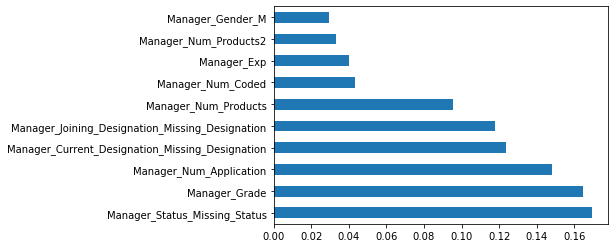

In [203]:
import pandas as pd
import numpy as np

X_5= df5.iloc[:,0:56]  #independent columns
y_5 = df5.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_5,y_5)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_5.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()